In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis
from sklearn.preprocessing import StandardScaler

In [45]:
df= pd.read_csv("C:/Users/Siti aisah/Data Mining/heart_disease_uci.csv")

In [47]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [49]:
#head
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [51]:
#head
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [53]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [55]:
#shape untuk menampilkan jumlah baris dan kolom
df.shape

(920, 16)

In [57]:
#finding missing value
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [59]:
#Mengatasi Missing Value
df['chol'] = df['chol'].fillna(df['chol'].mean())
df['thalch'] = df['thalch'].fillna(df['thalch'].mean())
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())
df['fbs'] = df['fbs'].fillna(df['fbs'].mean())
df['restecg'] = df['restecg'].fillna(df['restecg'].mode()[0])
df['exang'] = df['exang'].fillna(df['exang'].mode()[0])
df['slope'] = df['slope'].fillna(df['slope'].mode()[0])
df['ca'] = df['ca'].fillna(df['ca'].mean())
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())

C:\Users\Siti aisah\AppData\Local\Temp\ipykernel_25520\4089420957.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang'] = df['exang'].fillna(df['exang'].mode()[0])


In [61]:
#finding missing value
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [63]:
#cek data duplikat
df.duplicated().sum()

0

In [65]:
#melihat tipe data setiap kolom
print(df.dtypes)

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang          bool
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object


In [67]:
# Normalisasi kolom numerik
scaler = StandardScaler()
df[[ 'trestbps', 'chol', 'thalch', 'oldpeak','ca']] = scaler.fit_transform(df[['trestbps', 'chol', 'thalch', 'oldpeak','ca']])

In [69]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,0.698041,0.311021,True,lv hypertrophy,0.495698,False,1.349421,downsloping,-1.249371e+00,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,1.511761,0.797713,False,lv hypertrophy,-1.175955,True,0.589832,flat,4.292099e+00,normal,2
2,3,67,Male,Cleveland,asymptomatic,-0.658158,0.274289,False,lv hypertrophy,-0.340128,True,1.634267,flat,2.444942e+00,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,-0.115679,0.467130,False,normal,1.968345,False,2.488805,downsloping,-1.249371e+00,normal,0
4,5,41,Female,Cleveland,atypical angina,-0.115679,0.044717,False,lv hypertrophy,1.371326,False,0.494884,upsloping,-1.249371e+00,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,-0.278423,1.229308,True,st-t abnormality,0.654903,False,-0.834397,flat,-2.050756e-16,normal,1
916,917,62,Male,VA Long Beach,typical angina,0.000000,-0.552169,False,st-t abnormality,0.000000,False,0.000000,flat,-2.050756e-16,normal,0
917,918,55,Male,VA Long Beach,asymptomatic,-0.549662,0.219192,True,st-t abnormality,-1.494365,False,-0.834397,flat,-2.050756e-16,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,0.000000,1.706817,True,lv hypertrophy,0.000000,False,0.000000,flat,-2.050756e-16,normal,0


In [71]:
#Menghapus kolom yang tidak penting
df= df.drop(columns=['id'], errors='ignore')

In [73]:
df.columns

Index(['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [75]:
df

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,0.698041,0.311021,True,lv hypertrophy,0.495698,False,1.349421,downsloping,-1.249371e+00,fixed defect,0
1,67,Male,Cleveland,asymptomatic,1.511761,0.797713,False,lv hypertrophy,-1.175955,True,0.589832,flat,4.292099e+00,normal,2
2,67,Male,Cleveland,asymptomatic,-0.658158,0.274289,False,lv hypertrophy,-0.340128,True,1.634267,flat,2.444942e+00,reversable defect,1
3,37,Male,Cleveland,non-anginal,-0.115679,0.467130,False,normal,1.968345,False,2.488805,downsloping,-1.249371e+00,normal,0
4,41,Female,Cleveland,atypical angina,-0.115679,0.044717,False,lv hypertrophy,1.371326,False,0.494884,upsloping,-1.249371e+00,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,VA Long Beach,asymptomatic,-0.278423,1.229308,True,st-t abnormality,0.654903,False,-0.834397,flat,-2.050756e-16,normal,1
916,62,Male,VA Long Beach,typical angina,0.000000,-0.552169,False,st-t abnormality,0.000000,False,0.000000,flat,-2.050756e-16,normal,0
917,55,Male,VA Long Beach,asymptomatic,-0.549662,0.219192,True,st-t abnormality,-1.494365,False,-0.834397,flat,-2.050756e-16,fixed defect,2
918,58,Male,VA Long Beach,asymptomatic,0.000000,1.706817,True,lv hypertrophy,0.000000,False,0.000000,flat,-2.050756e-16,normal,0


In [77]:
pd.set_option('future.no_silent_downcasting', True)

obj_sex = {
    'Male':0,
    'Female':1
}
df['sex'] = df['sex'].replace(obj_sex)

# Konversi ke boolean jika diperlukan
df['fbs'] = df['fbs'].astype(bool)
df['exang'] = df['exang'].astype(bool)

# Konversi boolean ke numerik
df['fbs'] = df['fbs'].astype(int)
df['exang'] = df['exang'].astype(int)
df['sex'] = df['sex'].astype(int)
df

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,0,Cleveland,typical angina,0.698041,0.311021,1,lv hypertrophy,0.495698,0,1.349421,downsloping,-1.249371e+00,fixed defect,0
1,67,0,Cleveland,asymptomatic,1.511761,0.797713,0,lv hypertrophy,-1.175955,1,0.589832,flat,4.292099e+00,normal,2
2,67,0,Cleveland,asymptomatic,-0.658158,0.274289,0,lv hypertrophy,-0.340128,1,1.634267,flat,2.444942e+00,reversable defect,1
3,37,0,Cleveland,non-anginal,-0.115679,0.467130,0,normal,1.968345,0,2.488805,downsloping,-1.249371e+00,normal,0
4,41,1,Cleveland,atypical angina,-0.115679,0.044717,0,lv hypertrophy,1.371326,0,0.494884,upsloping,-1.249371e+00,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,1,VA Long Beach,asymptomatic,-0.278423,1.229308,1,st-t abnormality,0.654903,0,-0.834397,flat,-2.050756e-16,normal,1
916,62,0,VA Long Beach,typical angina,0.000000,-0.552169,0,st-t abnormality,0.000000,0,0.000000,flat,-2.050756e-16,normal,0
917,55,0,VA Long Beach,asymptomatic,-0.549662,0.219192,1,st-t abnormality,-1.494365,0,-0.834397,flat,-2.050756e-16,fixed defect,2
918,58,0,VA Long Beach,asymptomatic,0.000000,1.706817,1,lv hypertrophy,0.000000,0,0.000000,flat,-2.050756e-16,normal,0


In [79]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak',
       'ca', 'num'],
      dtype='object')

In [81]:
# Cek outliers pada seluruh kolom numeric
numeric_df= df.select_dtypes(include=['number'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas atas dan bawah untuk mendeteksi outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cek outliers 
outliers = ((numeric_df < lower_bound) | (numeric_df > upper_bound)).sum()
print(outliers)

age           0
sex         194
trestbps     28
chol        185
fbs         228
thalch        2
exang         0
oldpeak      16
ca          309
num           0
dtype: int64


In [86]:
# Kolom dengan outlier
columns_with_outliers = ['sex','age', 'fbs', 'thalch', 'ca', 'trestbps','oldpeak','ca','chol' ]

# Fungsi untuk mendeteksi dan mengisi outlier berdasarkan IQR
def fill_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  
        Q3 = df[col].quantile(0.75) 
        IQR = Q3 - Q1  
        lower_bound = Q1 - 1.5 * IQR  
        upper_bound = Q3 + 1.5 * IQR 

        # Mengisi outlier dengan nilai batas
        df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    
    return df

# Mengisi outlier di kolom yang memiliki outlier
df = fill_outliers(df, columns_with_outliers)

In [88]:
# Cek outliers pada seluruh kolom numeric
numeric_df= df.select_dtypes(include=['number'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas atas dan bawah untuk mendeteksi outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cek outliers 
outliers = ((numeric_df < lower_bound) | (numeric_df > upper_bound)).sum()
print(outliers)

age         0
sex         0
trestbps    0
chol        0
fbs         0
thalch      0
exang       0
oldpeak     0
ca          0
num         0
dtype: int64


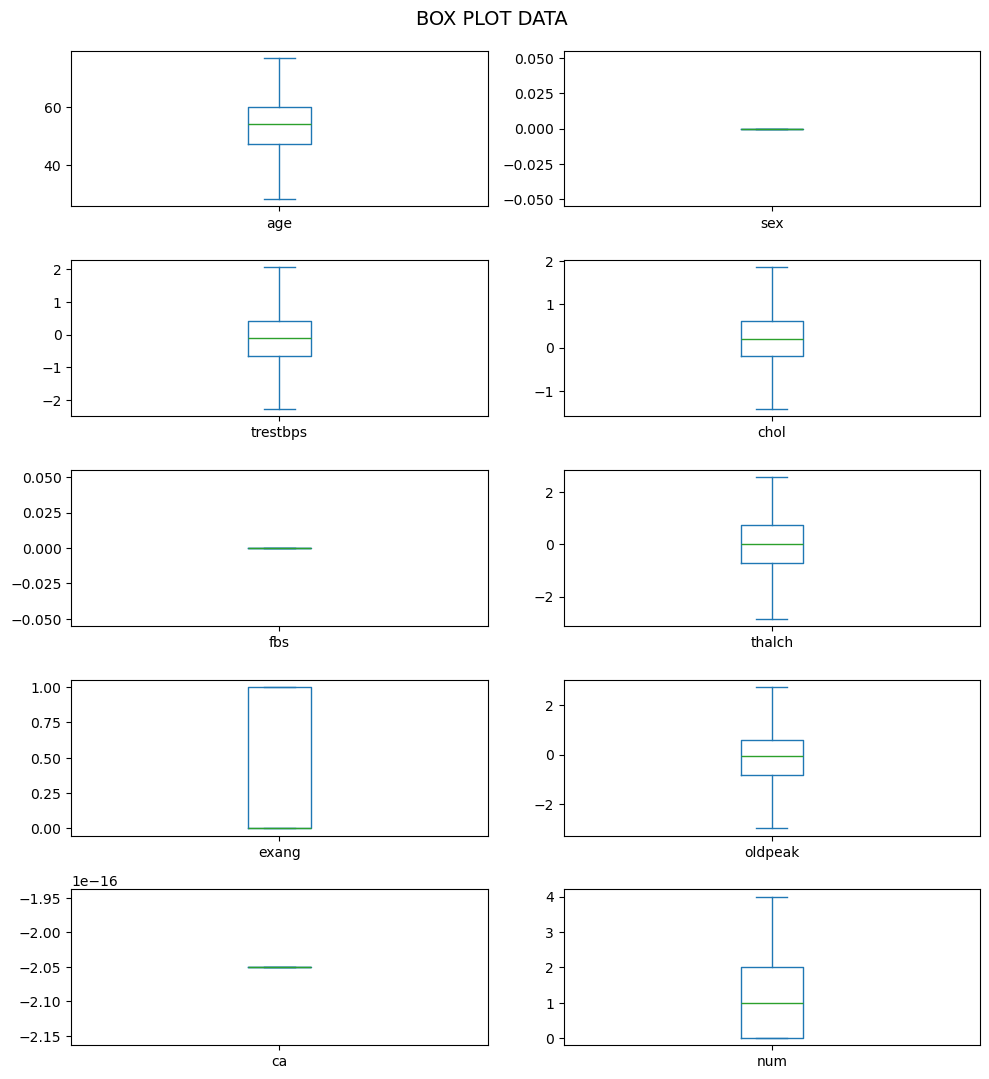

In [90]:
# Box Plot
df.plot(kind='box', subplots=True, layout=(len(df.columns)//2, 2), figsize=(10, 15))
plt.tight_layout()
plt.suptitle('BOX PLOT DATA \n', fontsize=14)
plt.tight_layout()
plt.show()

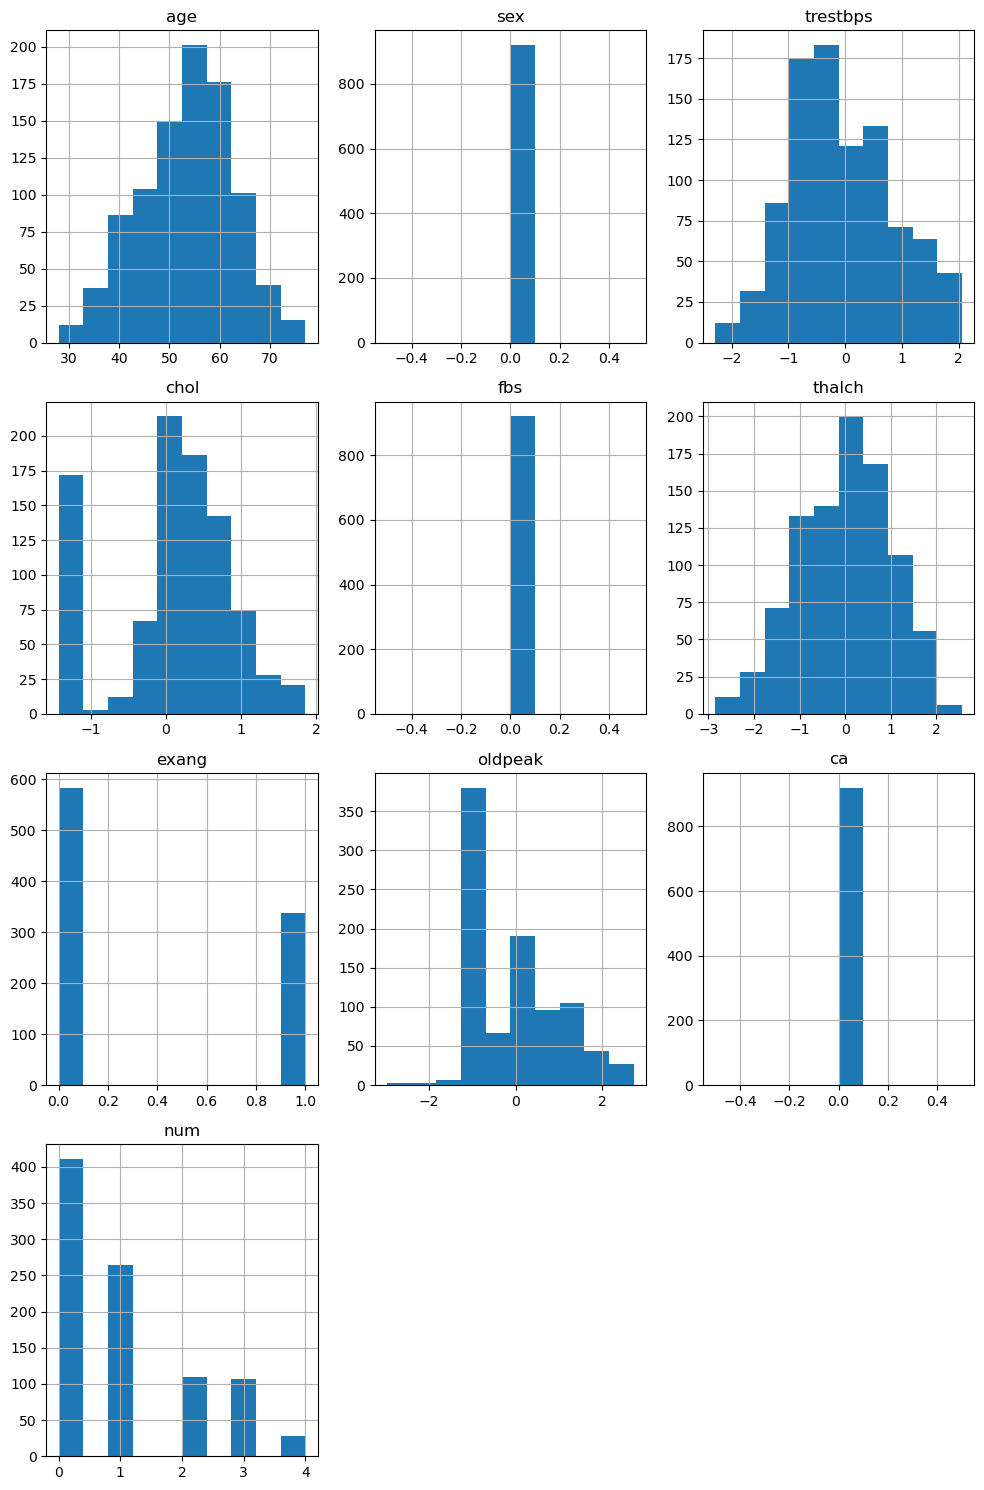

In [92]:
# Histogram
df.hist(figsize=(10, 15))
plt.tight_layout()
plt.show()